In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
import matplotlib.pyplot as plt


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install rdkit

In [ ]:
!pip install deepchem

In [ ]:
# Importer le fichier xlsx
file_name = "/content/drive/MyDrive/code/SweetnersDB.xlsx" #/path/to/the/file.xlsx

# Lire le fichier xlsx avec pandas
df_chimie = pd.read_excel(file_name, engine='openpyxl')

# Afficher les premières lignes du DataFrame
print(df_chimie.head())

                     Name  logSw Chemical family   Dataset  \
0      α-L-Rhamnopyranose  -0.85      saccharide  Training   
1                glycerol  -0.80          polyol  Training   
2     β-D-Galactopyranose  -0.72      saccharide  Training   
3  4-galactosyl-kojibiose  -0.66      saccharide  Training   
4               stachyose  -0.66      saccharide  Training   

                                              Smiles  
0          C[C@@H]1O[C@@H](O)[C@H](O)[C@H](O)[C@H]1O  
1                                           OCC(O)CO  
2         OC[C@H]1O[C@@H](O)[C@H](O)[C@@H](O)[C@H]1O  
3  OC[C@H]1O[C@H](O[C@@H]2[C@@H](O)[C@H](O[C@@H]3...  
4  OCC1OC(OCC2OC(OCC3OC(O[C@]4(CO)OC(CO)C(O)C4O)C...  


# Renommer les colonnes pour que ce soit plus simple

In [ ]:
df_chimie=df_chimie.rename(columns = {'Chemical family': 'chemF'})

In [ ]:
df_chimie.columns

Index(['Name', 'logSw', 'chemF', 'Dataset', 'Smiles'], dtype='object')

# Analyse de données

## logSw

In [ ]:
type(df_chimie.logSw[0])

numpy.float64

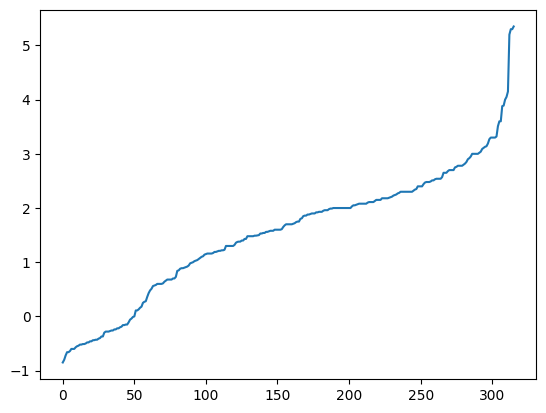

In [ ]:
plt.plot(df_chimie.logSw)

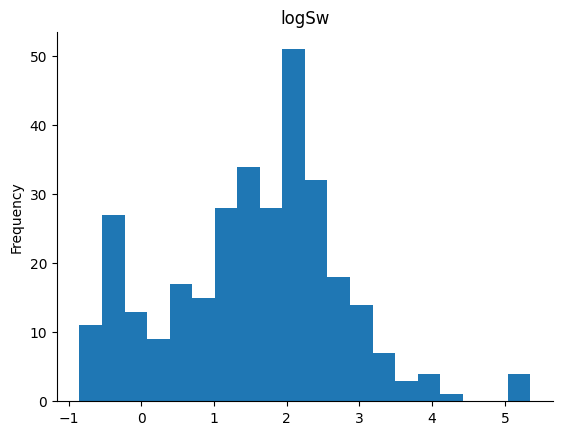

In [ ]:
# @title logSw

from matplotlib import pyplot as plt
df_chimie['logSw'].plot(kind='hist', bins=20, title='logSw')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
len(df_chimie.logSw),len(np.unique(df_chimie.logSw))

(316, 186)


Le logSw est le log en base 10 de la solubilité dans l'eau. Une valeur positive de logSw indique une solubilité supérieure à 1 mol/L Une valeur négative de logSw indique une solubilité inférieuer à 1 mol/L

## Chemical family


In [ ]:
type(df_chimie.chemF[0])

str

In [ ]:
len(np.unique(df_chimie.chemF))

10

In [ ]:
df_chimie.chemF.value_counts()

chemF
amino-acid         142
saccharide          64
terpene             36
phenol              23
polyphenol          11
polyol              10
sulfone             10
phenylpropanoid      8
other                8
guanidinium          4
Name: count, dtype: int64

## Dataset

In [ ]:
type(df_chimie.Dataset[0])

str

In [ ]:
len(np.unique(df_chimie.Dataset))

2

In [ ]:
df_chimie.Dataset.value_counts()

Dataset
Training    252
Test         64
Name: count, dtype: int64

Questions:
est-ce que les catégories sont correctement équilibrées entre le training et le test?

In [ ]:
df_train = df_chimie[df_chimie.Dataset=='Training']
df_test = df_chimie[df_chimie.Dataset=='Test']

In [ ]:
df_train.chemF.value_counts()

chemF
amino-acid         122
saccharide          55
terpene             26
phenol              18
polyol               9
polyphenol           8
phenylpropanoid      6
other                3
sulfone              3
guanidinium          2
Name: count, dtype: int64

In [ ]:
df_test.chemF.value_counts()

chemF
amino-acid         20
terpene            10
saccharide          9
sulfone             7
phenol              5
other               5
polyphenol          3
phenylpropanoid     2
guanidinium         2
polyol              1
Name: count, dtype: int64

**N.B.**:
- les catégories ayant moins de 10 éléments dans l'ensemble d'entrainement sont faiblement représentées.
- les catégories avec moins de 5 éléments dans l'ensemble de tests sont difficilement évaluables (est-ce que le résultat est le fruit de l'aléatoire ou d'un sur-apprentissage?)



<ipython-input-52-841e39923141>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df_chimie, x='logSw', y='Dataset', inner='stick', palette='Dark2')


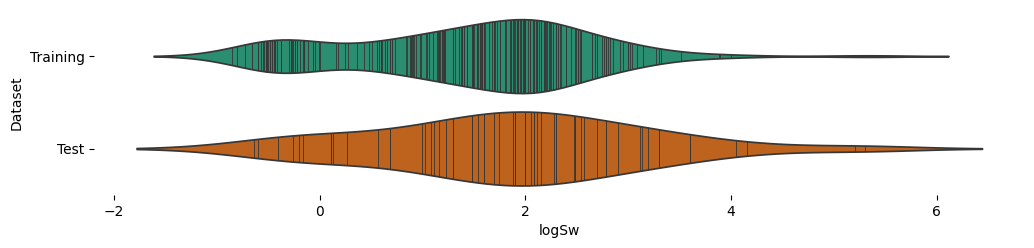

In [ ]:
# @title Dataset vs logSw

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_chimie['Dataset'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_chimie, x='logSw', y='Dataset', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

## Smiles

In [ ]:
type(df_chimie.Smiles[0])

str

In [ ]:
len(np.unique(df_chimie.Smiles))

316